# Comparación de las métricas para las diferentes alternativas

Dadas las diferente alternativas estudiadas, se ha planteado una parametrización del algoritmo de generación de las bases de datos sobre las que se realiza la clasificación de los vasos sanguíneos.

## Parametría empleada

In [1]:
import PARAMETERS

"""
LBP_METHOD
----------
Defines the LBP algorithm version to be used.
· default: LBP original version [https://medium.com/@rajatanantharam/local-binary-patterns-8807ecf7f87c].
· riu: Rotation invariant version [https://www.researchgate.net/publication/221303862_Gray_Scale_and_Rotation_Invariant_Texture_Classification_with_Local_Binary_Patterns].
· riu2: Improved rotation invariance with uniform patterns [https://www.researchgate.net/publication/221303862_Gray_Scale_and_Rotation_Invariant_Texture_Classification_with_Local_Binary_Patterns].
"""  # noqa
PARAMETERS.LBP_METHOD = 'riu2'

"""
METHOD
------
Defines the dataset structure.
· get_pyramid_dataset: Generate a single dataset in which each variable is a scale of the original image. Therefore, a single classifier is used.
· get_datasets_by_scale: Generate a dataset for each scale. Therefore, a different classifier is applied for scale.
"""  # noqa
PARAMETERS.METHOD = 'get_pyramid_dataset'

"""
INTERPOLATION_ALGORITHM
-----------------------
Defines the interpolation algorithm to be used in the image rescaling process.
· nearest: Pick one nearest pixel from the input image. Ignore all other input pixels.
· bicubic: Cubic interpolation on all pixels that may contribute to the output value.
· lanczos: Calculate the output pixel value using a high-quality Lanczos filter.
"""
PARAMETERS.INTERPOLATION_ALGORITHM = 'nearest'

"""
BALANCE    <- ONLY for get_pyramid_dataset
-------
Whether to remove data from the train set in order to equalize the proportion of instances of each label.
· True
· False
"""
PARAMETERS.BALANCE = False

"""
N_SCALES
--------
Number of scales to use.
1 - 6
"""
PARAMETERS.N_SCALES = 6

"""
GRAY_INTENSITY    <- ONLY for get_pyramid_dataset
--------------
Whether to add a variable with the intensity of each pixel in the gray scale image.
· True
· False
"""
PARAMETERS.GRAY_INTENSITY = True

"""
X2SCALE
-------
Whether to add a scale with x2 resolution.
· True
· False
"""
PARAMETERS.X2SCALE = False


PARAMETERS.ENCODING = 'categorical'


# Other parameters
PARAMETERS.PLOT = False
PARAMETERS.PLOT_LBP_LABEL = False
PARAMETERS.N_JOBS = 1
PARAMETERS.HEIGHT = 608
PARAMETERS.WIDTH = 576
PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"

### Algoritmo de interpolación

A continuación se va muestra el resultado gráfico proporcionado por la aplicación de diferentes algoritmos de interpolación en el reescalado de las imágenes. Se aplica así mismo al gold standard con la finalidad de visualizar el efecto de la transformación a menores dimensiones.

En primer lugar se aplica una configuración inicial al algoritmo de generación de las bases de datos para que muestre los resultados esperados.

In [2]:
from create_db import main
%matplotlib inline

# Plot the LBP transformation result with the label
PARAMETERS.PLOT_LBP_LABEL = True
# Individual configuration for each scale
PARAMETERS.METHOD = 'get_datasets_by_scale'
# Scales
PARAMETERS.N_SCALES = 6

#### Nearest neighbor

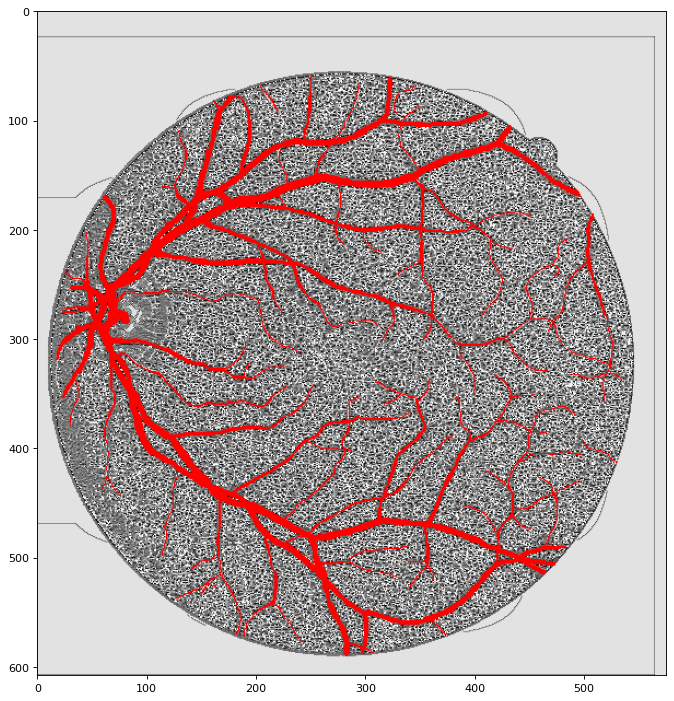

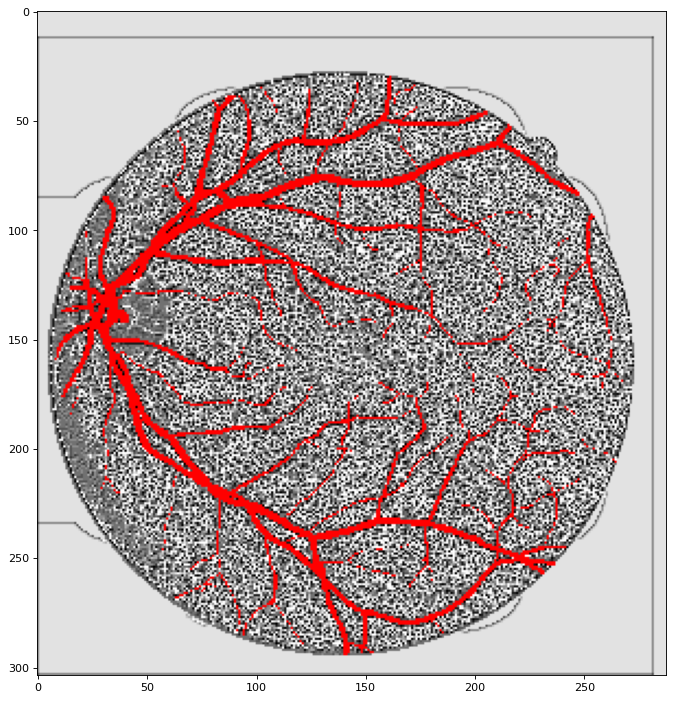

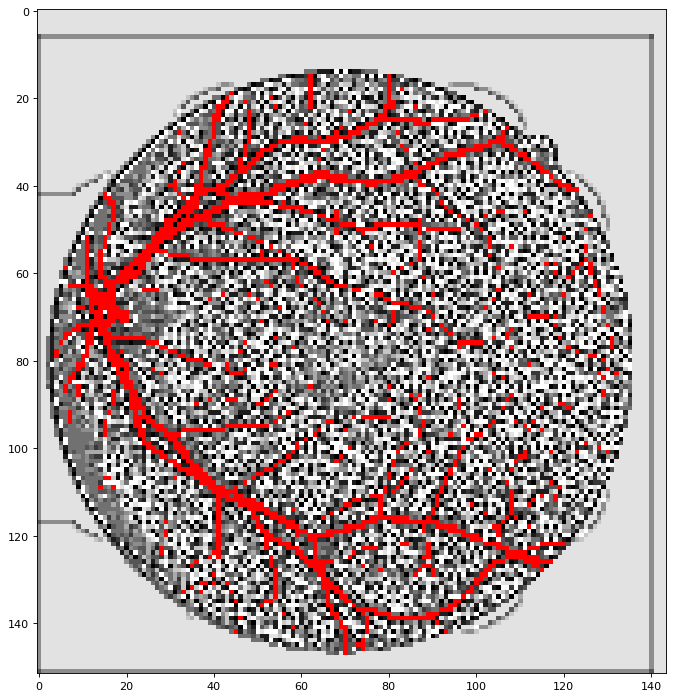

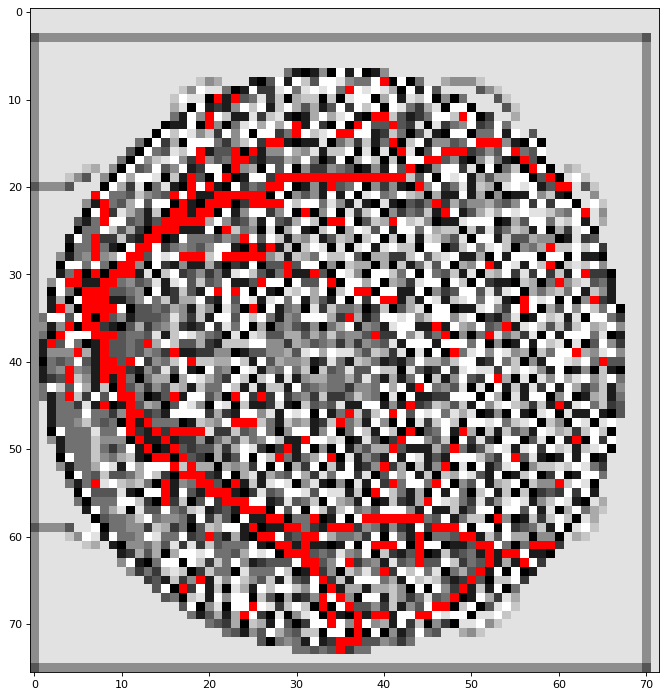

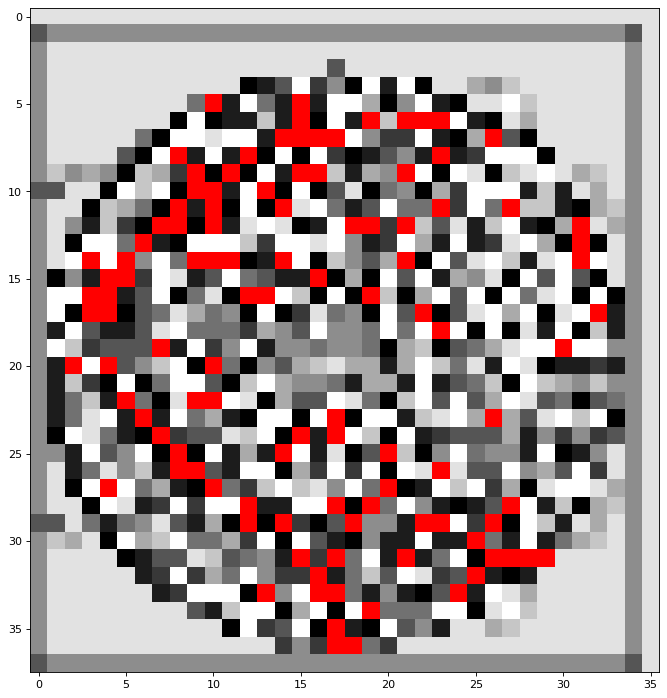

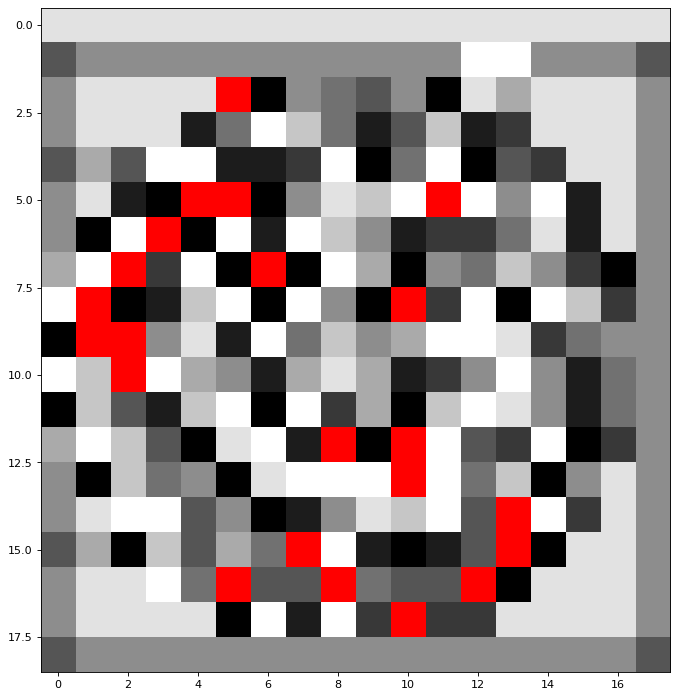

In [3]:
# Algorithm
import os
os.environ['SKIP_VALIDATION'] = 'True'

PARAMETERS.INTERPOLATION_ALGORITHM = 'nearest'

#print(VALID_PARAMETERS)

# Execution for the first image
main(single_exec=True)

#### Bicubic

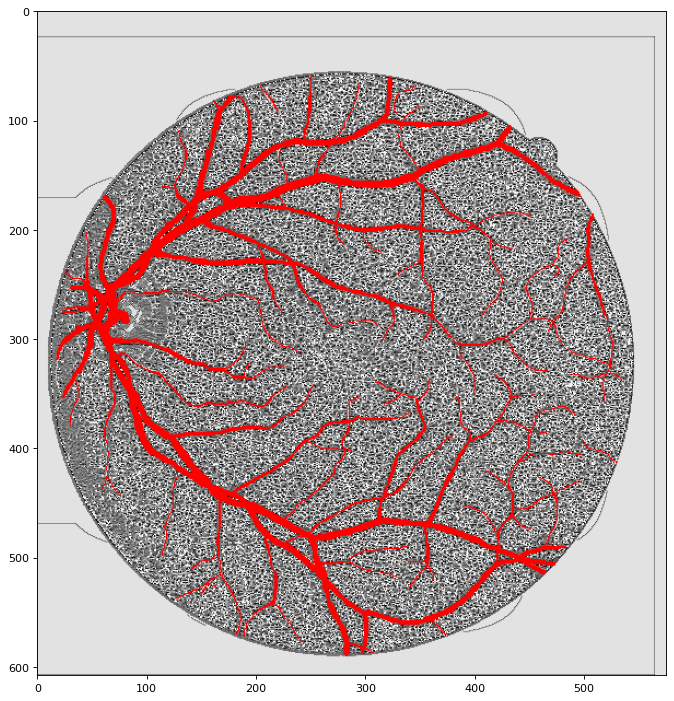

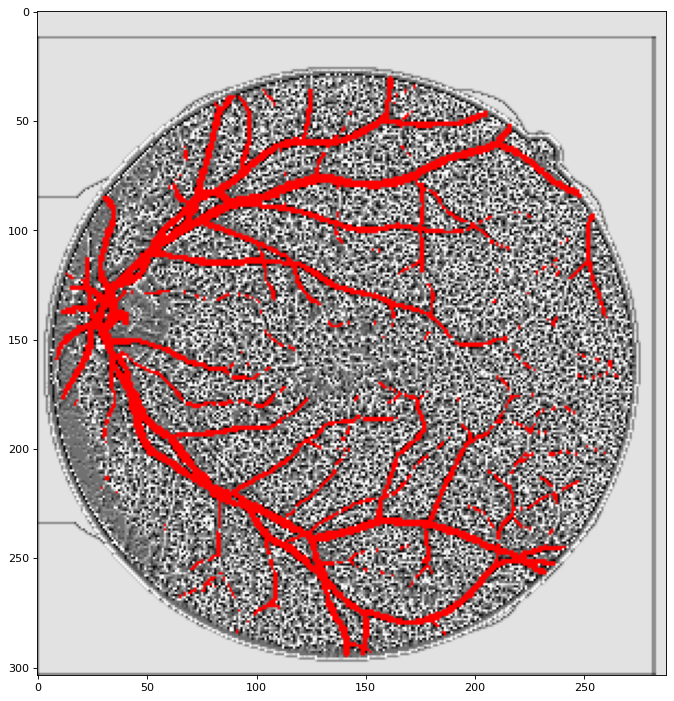

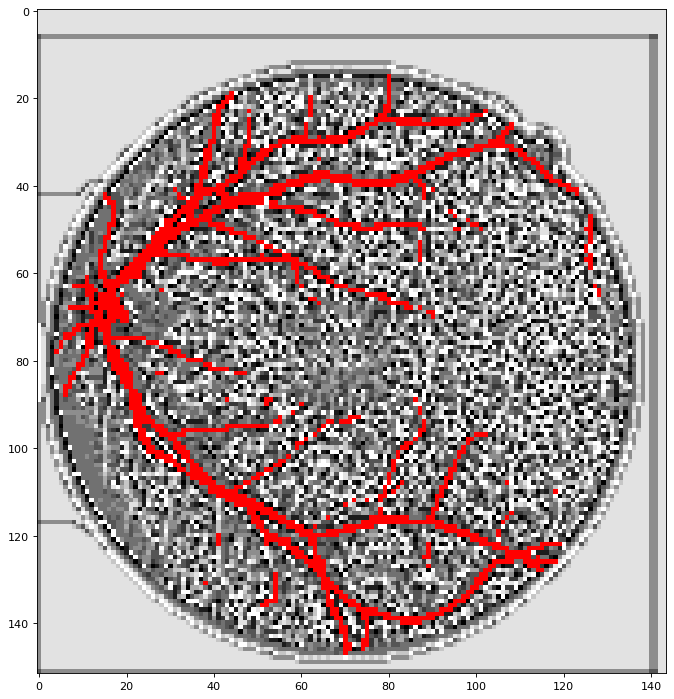

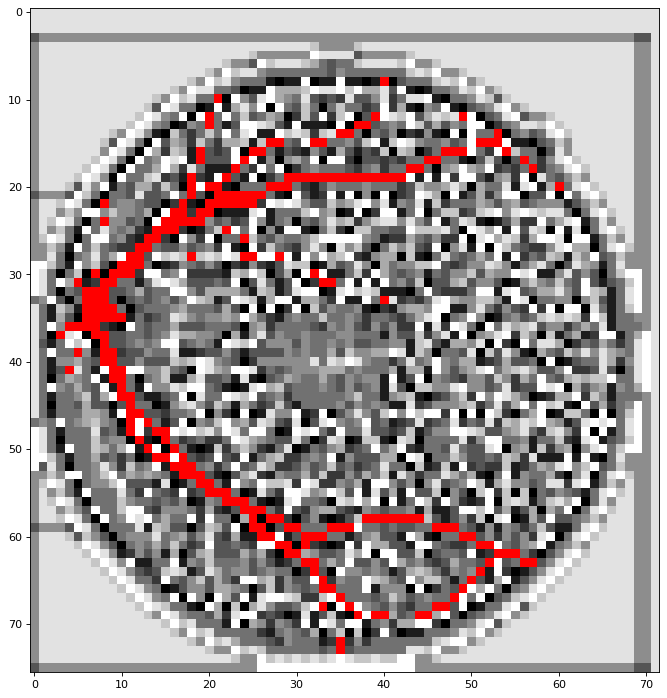

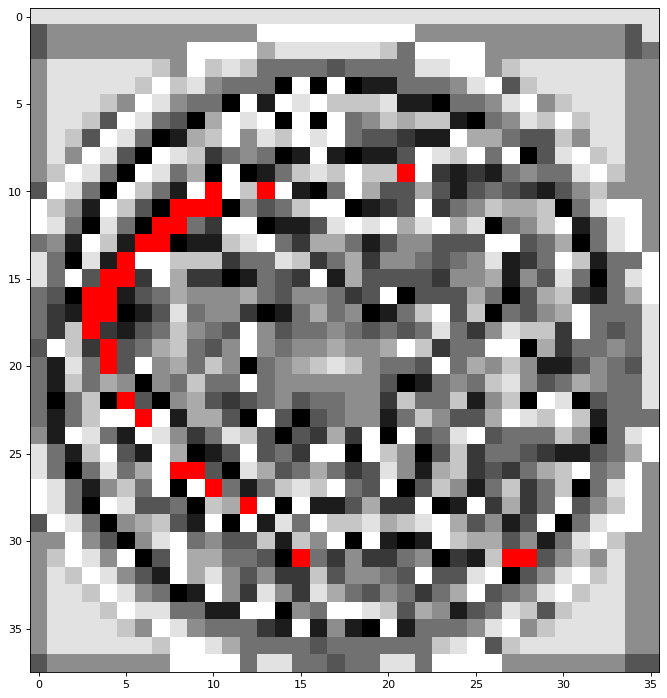

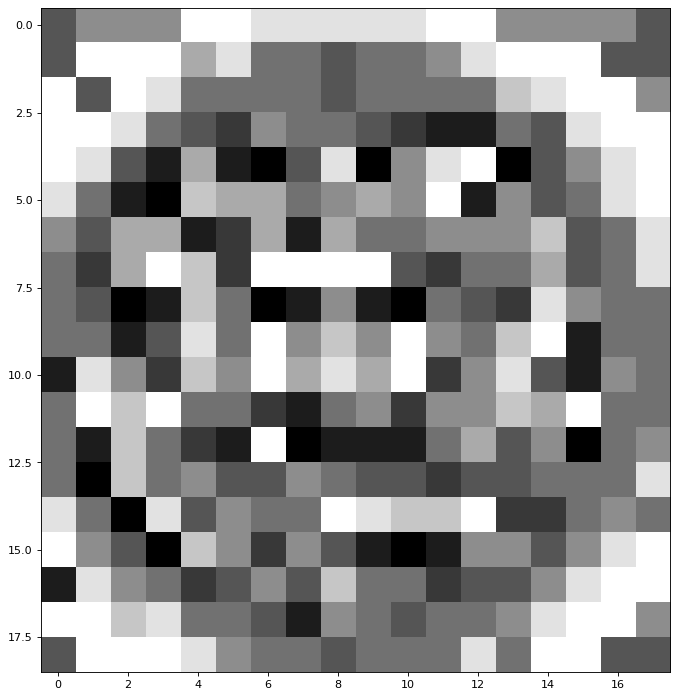

In [4]:
# Algorithm
PARAMETERS.INTERPOLATION_ALGORITHM = 'bicubic'

# Execution for the first image
main(single_exec=True)

#### Lanczos

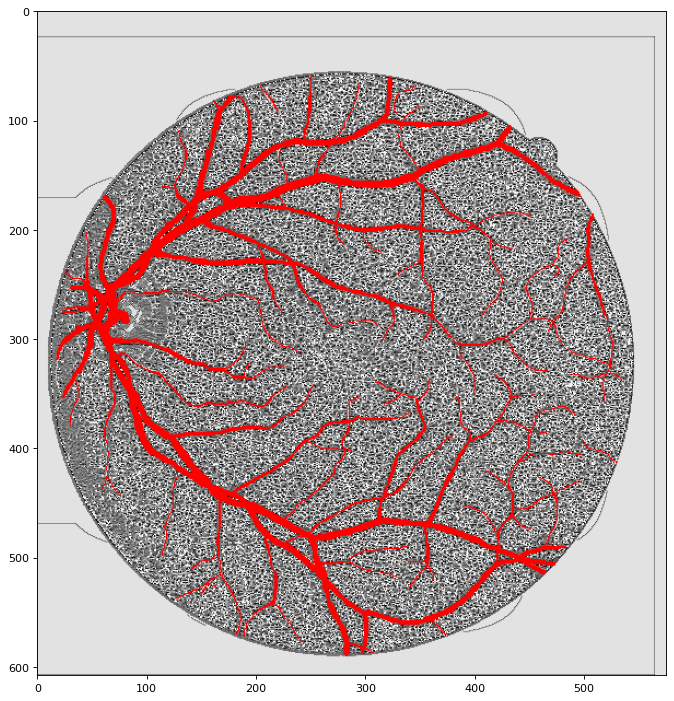

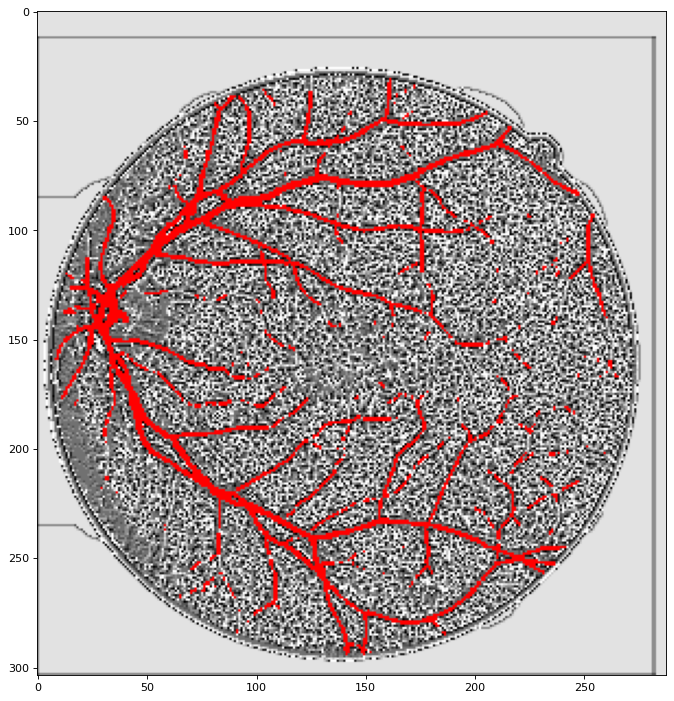

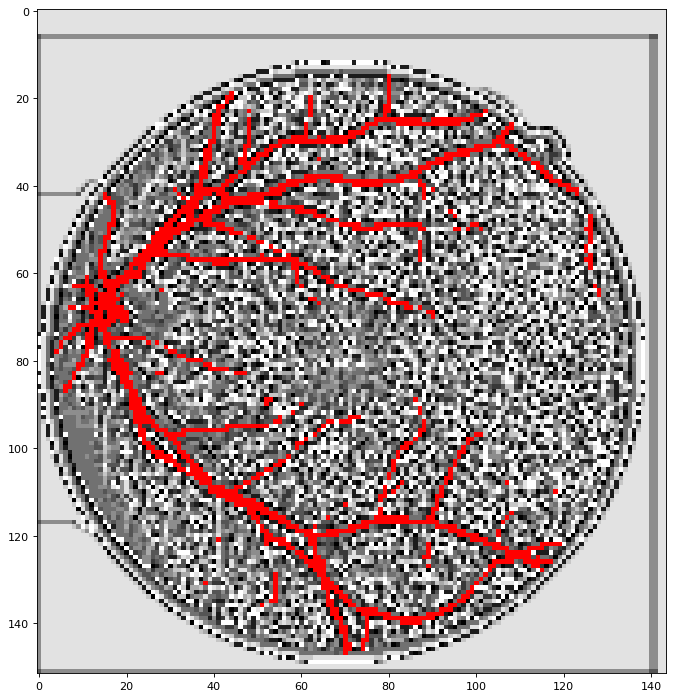

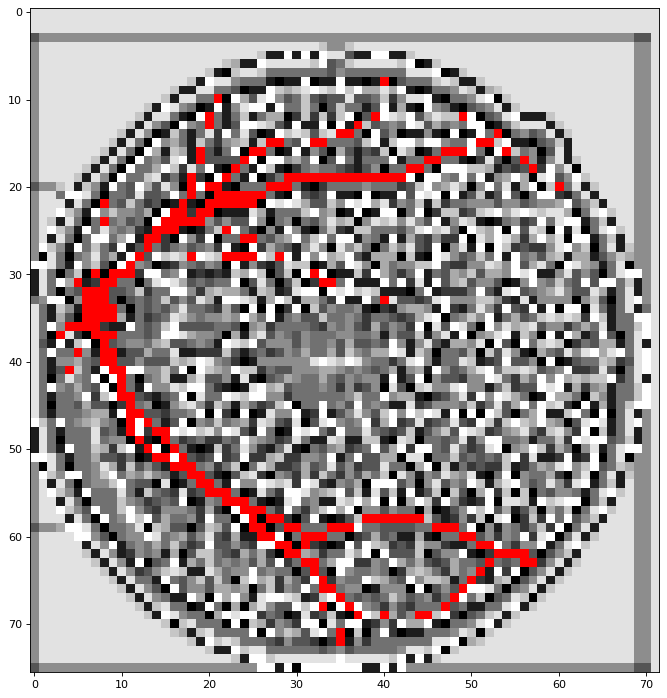

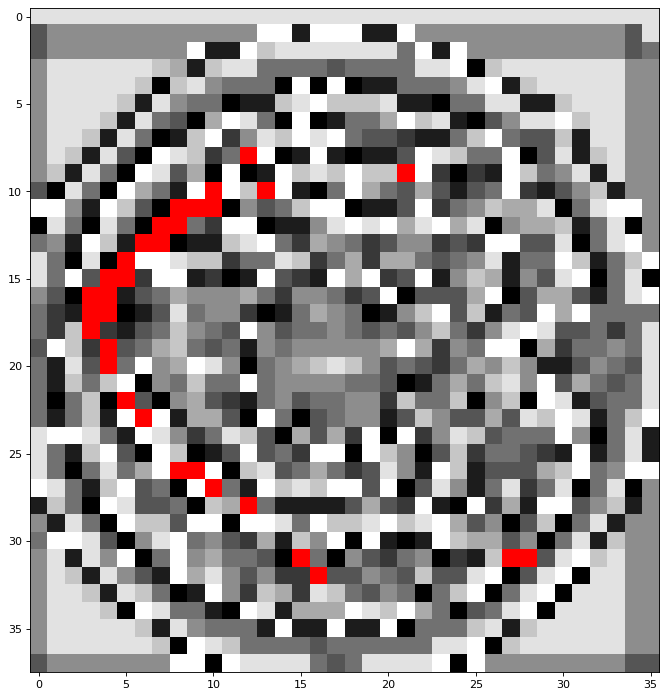

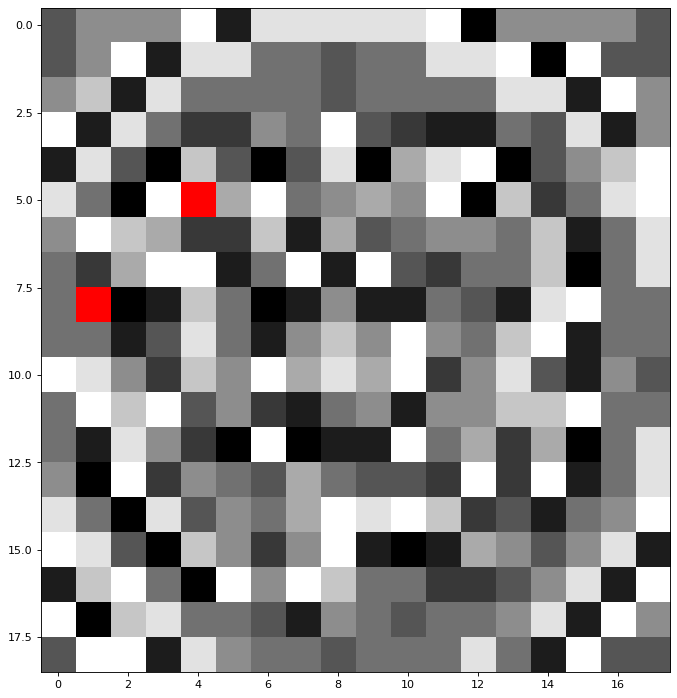

In [5]:
# Algorithm
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'

# Execution for the first image
main(single_exec=True)

### Variantes del operador LBP

Se contemplan las tres versiones del operador LBP.

### Utilización de la intensidad original de las imágenes

Dado que la intensidad original de las imágenes en escala de grises aporta información adicional que puede ser empleada por el clasificador ya que las imágenes se encuentran normalizadas y generalmente los vasos sanguíneos proporcionan una intensidad similar entre sí, se comprueba el efecto proporcionado por su utilización, es decir, se generan bases de datos tanto con esta información adicional como sin ella.

### Balanceado de los datos

Así mismo, debido a que en el conjunto de datos generado cada instancia es un píxel de la imagen, la clasificación de las instancias como vaso sanguíneo se encuentra en una proporción muy inferior, lo que podría provocar un sesgo inicial en el clasificador. Con la finalidad de comprobar si este hecho es perjudicial sobre el poder predictivo del clasificador se realiza en algunas bases de datos una selección aleatoria, es decir, un muestreo, de píxeles etiquetados de forma negativa, equilibrando la proporción al 50% con los representativos de vasos sanguíneos.

### Utilización de diferentes escalas

Dado que se desconoce en qué reducción de escala es posible que la información proporcionada deje de aportar valor debido a la pérdida de calidad de los datos en el procedimiento de reescalado, se prueban diferentes configuraciones. Se toman valores entre 3 y 6 escalas.

### Escala x2

Otra configuración que se ha considerado de interés es el reescalado al doble de dimensiones respecto a la imagen original.

## Clasificación para las diferentes configuraciones de parametría (Grid Search)

De esta forma, se ha definido un rango de parámetros entorno a los cuales se ha realizado el cálculo de las BBDD con la finalidad de comprobar los resultados proporcionados por la clasificación basada en cada una de ellas.

In [6]:
VALID_PARAMETERS = {
    'LBP_METHOD': ['riu2', 'default', 'riu', 'var', 'nriuniform'],
    'METHOD': ['get_pyramid_dataset'],
    'INTERPOLATION_ALGORITHM': ['nearest', 'lanczos', 'bicubic'],
    'BALANCE': [False, True],
    'N_SCALES': list(range(1, 7)),
    'GRAY_INTENSITY': [True, False],
    'X2SCALE': [False, True],
}

Para la definición y ejecución de la totalidad de las combinaciones de parametría en la generación de las bases de datos se emplea el siguiente código.

In [7]:
import PARAMETERS
from create_db import main
import itertools

skip_process = True
PARAMETERS.PLOT = False
PARAMETERS.PLOT_LBP_LABEL = False

dict_keys = list(VALID_PARAMETERS.keys())
for combination in itertools.product(*[VALID_PARAMETERS[k] for k in dict_keys]):
    print(combination)
    for i, v in enumerate(combination):
        setattr(PARAMETERS, dict_keys[i], v)
        PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
    if not (PARAMETERS.N_SCALES == 1 and PARAMETERS.X2SCALE) and not skip_process:
        main()

('riu2', 'get_pyramid_dataset', 'nearest', False, 1, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 1, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 1, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 1, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, False, False)
('riu2', '

Con ello, los diferentes datasets son almacenados en ficheros comprimidos para ser utilizados posteriormente con un bucle similar en el que se lleva a cabo el proceso de clasificación.

In [8]:
from main import main
import pandas as pd
import os
from pathlib import Path

os.environ['GRID_SEARCH'] = 'TRUE'

if skip_process:
    metrics = pd.read_csv('../Results/metrics.csv', index_col='Unnamed: 0')
else:
    metrics = pd.DataFrame(columns=[
                'LBP', 'Method', 'Interpolation', 'Balance', 'n_scales', 'x2', 'Gray Intensity',
                'Accuracy', 'F1 score', 'tn', 'fp', 'fn', 'tp'
            ])
    parent_path = '..'
    for filename in Path(f"{parent_path}/DB").glob('train_train_*'):
        PARAMETERS.FILE_EXTENSION = str(filename).replace('train_train_', '').split('/')[-1].replace('.zip', '').replace('.pkl', '')
        print(PARAMETERS.FILE_EXTENSION)
        properties = PARAMETERS.FILE_EXTENSION.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        PARAMETERS.LBP_METHOD = properties[0]
        PARAMETERS.METHOD = properties[1].replace(
            'get-pyramid-dataset', 'get_pyramid_dataset').replace('get-dataset-by-scale', 'get_datasets_by_scale')
        PARAMETERS.INTERPOLATION_ALGORITHM = properties[2]
        PARAMETERS.BALANCE = properties[3].replace('balance-', '') == 'True'
        PARAMETERS.N_SCALES = int(properties[4].replace('scales-', ''))
        PARAMETERS.X2SCALE = properties[5].replace('x2-', '') == 'True'
        PARAMETERS.GRAY_INTENSITY = properties[6].replace('gray-intensity-', '') == 'True'
        metrics = metrics.append(pd.DataFrame(
            (
                PARAMETERS.LBP_METHOD,
                PARAMETERS.METHOD,
                PARAMETERS.INTERPOLATION_ALGORITHM,
                PARAMETERS.BALANCE,
                PARAMETERS.N_SCALES,
                PARAMETERS.X2SCALE,
                PARAMETERS.GRAY_INTENSITY
            ) + main(),
            index=[
                'LBP', 'Method', 'Interpolation', 'Balance', 'n_scales', 'x2', 'Gray Intensity',
                'Accuracy', 'F1 score', 'tn', 'fp', 'fn', 'tp'
            ]
        ).T, ignore_index=True)
    metrics.to_csv(f"../Results/metrics.csv")
metrics['Sensivity'] = metrics['tp'] / (metrics['tp'] + metrics['fn'])
metrics['Specificity'] = metrics['tn'] / (metrics['tn'] + metrics['fp'])
metrics.drop(columns=['tn', 'fp', 'fn', 'tp'], inplace=True)
metrics.head()

LBP               Method Interpolation  Balance  n_scales     x2  \
0         var  get_pyramid_dataset       bicubic    False         6  False   
1        riu2  get_pyramid_dataset       lanczos    False         2  False   
2     default  get_pyramid_dataset       bicubic    False         3  False   
3  nriuniform  get_pyramid_dataset       lanczos     True         3  False   
4         riu  get_pyramid_dataset       bicubic     True         6   True   

   Gray Intensity  Accuracy  F1 score  Sensivity  Specificity  
0           False     0.744     0.409   0.689219     0.751604  
1            True     0.880     0.222   0.133899     0.989582  
2            True     0.891     0.503   0.429831     0.958888  
3            True     0.714     0.414   0.788487     0.702588  
4           False     0.756     0.447   0.768289     0.753715

## Análisis de los resultados obtenidos

A continuación, se obtienen una serie de estadísticas acerca del poder predictivo mostrado por cada parametría.

### Algoritmo de interpolación

In [9]:
metrics.groupby("Interpolation")["Accuracy"].describe()

count      mean       std    min      25%     50%      75%  \
Interpolation                                                               
bicubic        220.0  0.779714  0.095867  0.504  0.71525  0.7580  0.87700   
lanczos        220.0  0.778732  0.097056  0.522  0.70925  0.7575  0.87725   
nearest        220.0  0.780295  0.092461  0.547  0.71375  0.7560  0.87625   

                 max  
Interpolation         
bicubic        0.895  
lanczos        0.896  
nearest        0.892

In [10]:
metrics.groupby("Interpolation")["F1 score"].describe()

count      mean       std  min      25%     50%      75%    max
Interpolation                                                                 
bicubic        220.0  0.373732  0.124514  0.0  0.33975  0.4025  0.44800  0.554
lanczos        220.0  0.370686  0.125996  0.0  0.33250  0.3975  0.44725  0.556
nearest        220.0  0.364232  0.116379  0.0  0.33075  0.3925  0.42900  0.546

Se observa que los mejores resultados, y más estables, son los obtenidos con la interpolación bicúbica, con resultados muy similares para lanczos.

### Balanceado de los datos

In [11]:
metrics.groupby("Balance")["Accuracy"].describe()

count      mean       std    min     25%    50%    75%    max
Balance                                                               
False    330.0  0.855236  0.056477  0.654  0.8690  0.877  0.885  0.896
True     330.0  0.703924  0.058374  0.504  0.6645  0.721  0.741  0.871

In [12]:
metrics.groupby("Balance")["F1 score"].describe()

count      mean       std  min      25%     50%      75%    max
Balance                                                                 
False    330.0  0.353633  0.157560  0.0  0.28825  0.3935  0.46900  0.556
True     330.0  0.385467  0.067833  0.0  0.35700  0.4010  0.43375  0.476

Como cabía esperar, se obtiene un mayor porcentaje de acierto a costa de una menor tasa para la categoría no predominante, los vasos sanguíneos cuando se realiza un balanceado. Sin embargo, al no realizarlo los resultados son muy dispares, como se puede observar en la desviación típica, con lo que en algunas combinaciones parece favorable el disponer de una mayor cantidad de datos a entrenar en el clasificador.

### Número de escalas

In [13]:
metrics.groupby("n_scales")["Accuracy"].describe()

count      mean       std    min      25%     50%      75%    max
n_scales                                                                   
1          60.0  0.766133  0.123557  0.563  0.63800  0.8530  0.87100  0.876
2         120.0  0.759933  0.114397  0.504  0.65550  0.8105  0.87100  0.885
3         120.0  0.768008  0.097196  0.556  0.69175  0.7270  0.87325  0.891
4         120.0  0.782192  0.086912  0.597  0.72100  0.7400  0.88025  0.896
5         120.0  0.793467  0.078128  0.653  0.73500  0.7540  0.88325  0.895
6         120.0  0.801025  0.070314  0.704  0.74100  0.7635  0.88300  0.894

In [14]:
metrics.groupby("n_scales")["F1 score"].describe()

count      mean       std    min      25%     50%      75%    max
n_scales                                                                   
1          60.0  0.196683  0.163168  0.000  0.00000  0.2040  0.34175  0.476
2         120.0  0.278100  0.132134  0.000  0.22125  0.3150  0.36225  0.475
3         120.0  0.356958  0.080594  0.111  0.32250  0.3785  0.40525  0.503
4         120.0  0.414383  0.061183  0.274  0.37850  0.4180  0.44825  0.547
5         120.0  0.438525  0.055564  0.318  0.40650  0.4370  0.46425  0.554
6         120.0  0.446217  0.048608  0.318  0.41600  0.4385  0.46900  0.556

En lo relativo al número de escalas, parece que la posibilidad de disponer de una mayor cantidad de datos siempre es favorable, siendo el efecto cada vez menos relevante a medida que la calidad de la información (menores escalas) es inferior.

### Utilización de la escala x2

In [15]:
metrics.groupby("x2")["Accuracy"].describe()

count      mean       std    min      25%     50%    75%    max
x2                                                                    
False  360.0  0.781508  0.096929  0.504  0.71675  0.7590  0.880  0.896
True   300.0  0.777267  0.092754  0.556  0.70600  0.7545  0.875  0.891

In [16]:
metrics.groupby("x2")["F1 score"].describe()

count      mean       std  min      25%     50%      75%    max
x2                                                                    
False  360.0  0.358664  0.135551  0.0  0.32475  0.3980  0.44100  0.548
True   300.0  0.382613  0.102776  0.0  0.34400  0.3955  0.44625  0.556

Aunque en la mayoría de combinaciones de parámetros no tiene un efecto positivo, se puede observar que para algunas permite aumentar la capacidad de identificación de los vasos sanguíneos, obteniendo unos valores F1 superiores.

### Intensidad original

In [17]:
metrics.groupby("Gray Intensity")["Accuracy"].describe()

count      mean       std    min     25%    50%      75%  \
Gray Intensity                                                             
False           330.0  0.768142  0.102961  0.504  0.6955  0.750  0.87200   
True            330.0  0.791018  0.084949  0.608  0.7240  0.763  0.88275   

                  max  
Gray Intensity         
False           0.888  
True            0.896

In [18]:
metrics.groupby("Gray Intensity")["F1 score"].describe()

count     mean       std    min      25%    50%      75%  \
Gray Intensity                                                             
False           330.0  0.32383  0.134143  0.000  0.28500  0.367  0.41675   
True            330.0  0.41527  0.088017  0.108  0.37725  0.427  0.46375   

                  max  
Gray Intensity         
False           0.506  
True            0.556

De nuevo, una mayor cantidad de información permite la obtención de unos mejores resultados.

### Versión del operador LBP

In [19]:
metrics.groupby("LBP")["Accuracy"].describe()

count      mean       std    min      25%     50%      75%    max
LBP                                                                          
default     132.0  0.796932  0.091083  0.563  0.73475  0.8115  0.88200  0.896
nriuniform  132.0  0.788439  0.094842  0.585  0.71550  0.8030  0.87700  0.892
riu         132.0  0.794136  0.095560  0.594  0.72375  0.8125  0.88225  0.896
riu2        132.0  0.787545  0.098329  0.600  0.70675  0.8055  0.88000  0.893
var         132.0  0.730848  0.079132  0.504  0.69475  0.7340  0.77700  0.871

In [20]:
metrics.groupby("LBP")["F1 score"].describe()

count      mean       std  min      25%     50%      75%    max
LBP                                                                        
default     132.0  0.403879  0.117971  0.0  0.36300  0.4360  0.46600  0.556
nriuniform  132.0  0.372326  0.119872  0.0  0.34500  0.4020  0.43825  0.529
riu         132.0  0.375091  0.132391  0.0  0.34350  0.4105  0.45100  0.544
riu2        132.0  0.348076  0.131218  0.0  0.30875  0.3920  0.42575  0.517
var         132.0  0.348379  0.100023  0.0  0.31500  0.3710  0.40950  0.476

El operador LBP que proporciona mejores resultados es el original, el que posee la información completa de las 256 categorías.

## Análisis de la parametría con mejor resultado

In [21]:
metrics.sort_values(by=['Accuracy'], ascending=False).head()

LBP               Method Interpolation  Balance  n_scales     x2  \
252      riu  get_pyramid_dataset       lanczos    False         4  False   
646  default  get_pyramid_dataset       lanczos    False         4  False   
20       riu  get_pyramid_dataset       lanczos    False         5  False   
240  default  get_pyramid_dataset       bicubic    False         4  False   
38       riu  get_pyramid_dataset       bicubic    False         4  False   

     Gray Intensity  Accuracy  F1 score  Sensivity  Specificity  
252            True     0.896     0.535   0.467002     0.959052  
646            True     0.896     0.547   0.489199     0.955698  
20             True     0.895     0.541   0.481697     0.955685  
240            True     0.895     0.546   0.491750     0.954401  
38             True     0.895     0.535   0.470022     0.957537

In [22]:
metrics.sort_values(by=['F1 score'], ascending=False).head()

LBP               Method Interpolation  Balance  n_scales     x2  \
53   default  get_pyramid_dataset       lanczos    False         6   True   
319  default  get_pyramid_dataset       bicubic    False         5   True   
466  default  get_pyramid_dataset       bicubic    False         6   True   
527  default  get_pyramid_dataset       lanczos    False         5   True   
592  default  get_pyramid_dataset       lanczos    False         5  False   

     Gray Intensity  Accuracy  F1 score  Sensivity  Specificity  
53             True     0.887     0.556   0.550833     0.936278  
319            True     0.886     0.554   0.550251     0.935444  
466            True     0.886     0.554   0.552791     0.934655  
527            True     0.887     0.553   0.545015     0.937328  
592            True     0.894     0.548   0.498499     0.952675

Dado que el objetivo del proyecto es la determinación automática de la presencia de vasos sanguíneos, se toma como mejor resultado aquel que proporciona un mayor valor de *F1 score*, que aun proporcionando una mayor cantidad de falsas detecciones que aquellos con una preción superior, permite alcanzar mejor el objetivo definido.

In [23]:
metrics.sort_values(by=['F1 score'], ascending=False).iloc[0, :].to_frame().T

LBP               Method Interpolation Balance n_scales    x2  \
53  default  get_pyramid_dataset       lanczos   False        6  True   

   Gray Intensity Accuracy F1 score Sensivity Specificity  
53           True    0.887    0.556  0.550833    0.936278

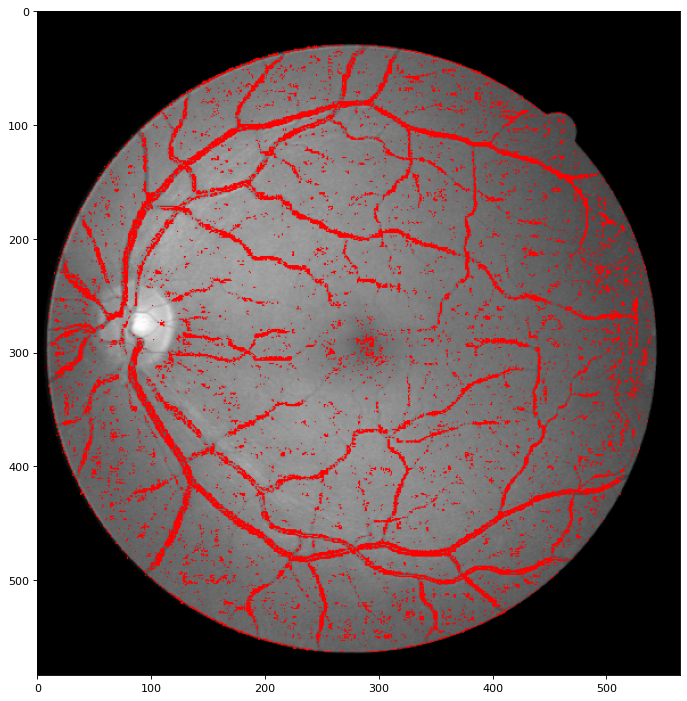

(0.887, 0.553, 1113119, 74426, 79696, 95466)

In [24]:
from main import main

PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"

PARAMETERS.PLOT = True

main(plot_once=True)

A continuación, se utiliza el clasificador LightGBM junto con la técnica conocida como GridSearch respecto a su parametría.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


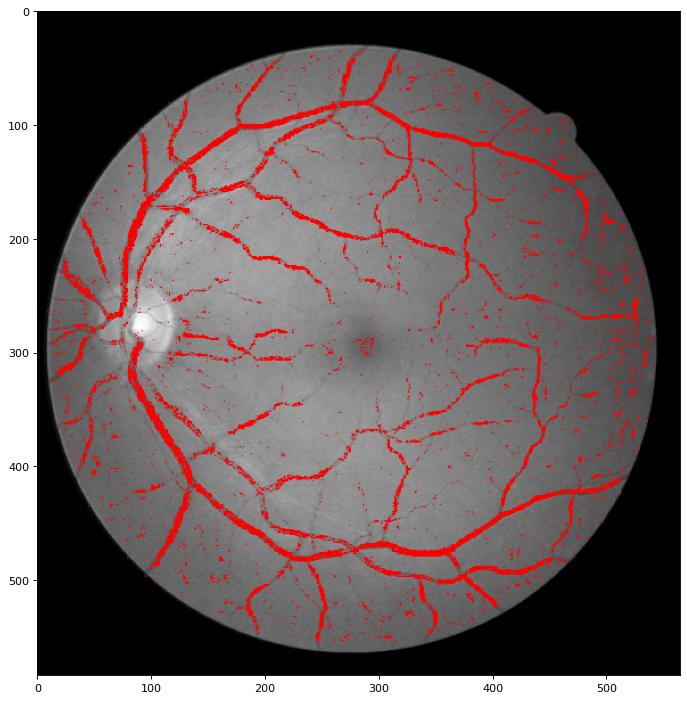

(0.907, 0.553, 1158168, 29377, 97019, 78143)

In [25]:
main(lgb=True, plot_once=True)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


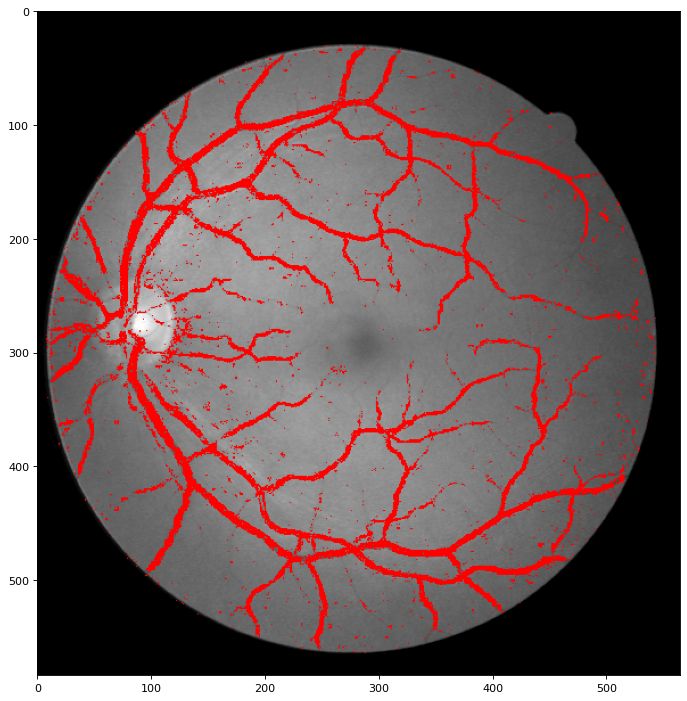

(0.925, 0.696, 1143637, 43908, 58217, 116945)

In [26]:
main(lgb=True, plot_once=True, all_lbp=True)